#### Objective

The goal is to segment our customers into categories based on their profile to easily determine credit worthiness

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('Mall_Customers.csv')

##### Data Profiling

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This is an unsupervised learning problem as we currently don't have the customer categories/segment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
num_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

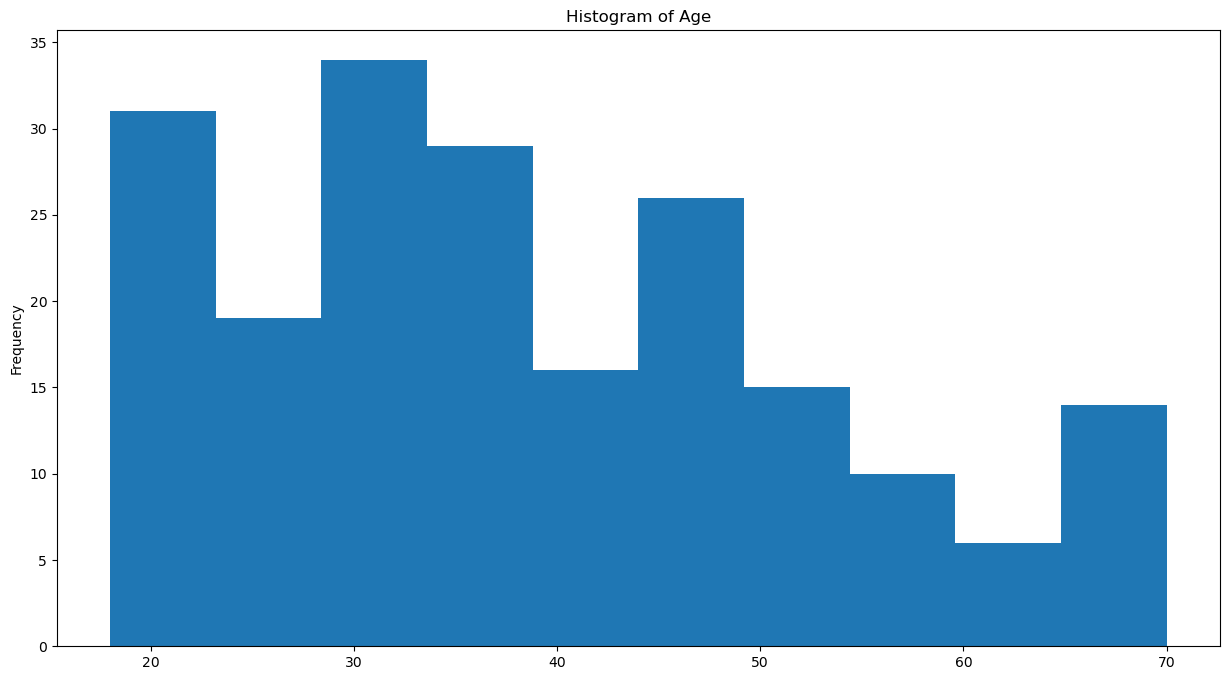

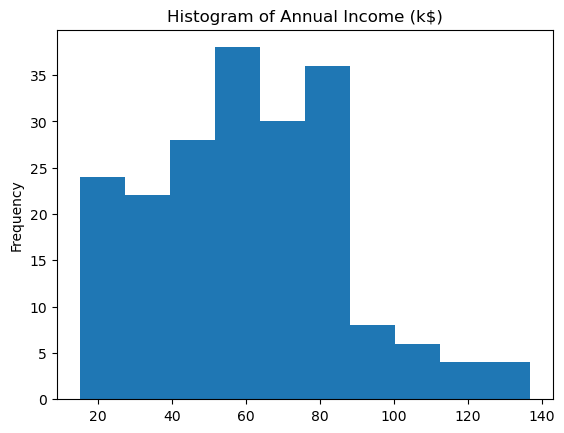

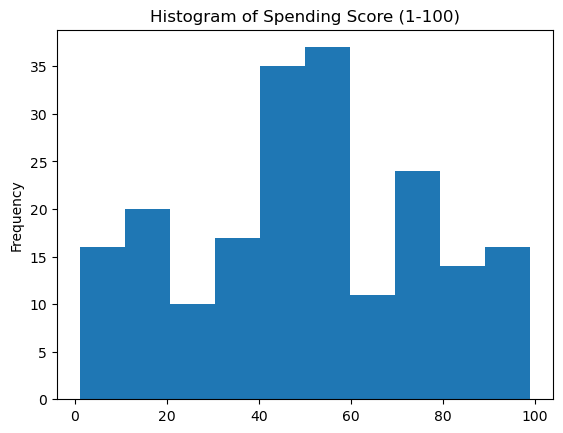

In [9]:
plt.figure(figsize=(15,8))

for col in num_features:
    plt.hist(data=df, x=col)
    plt.title(f'Histogram of {col}')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

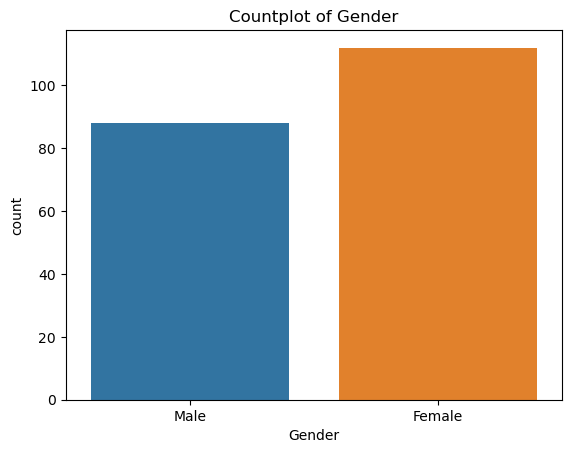

In [12]:
sb.countplot(df, x='Gender')
plt.title(f'Countplot of Gender')
plt.show()

#### Data Cleaning

In [13]:
df.drop('CustomerID', axis=1, inplace=True)

In [14]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [15]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.duplicated().sum()

0

##### Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = scaler.fit_transform(df)

In [20]:
features

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

#### Model Building

In [21]:
## Kmeans Clustering

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init=100, max_iter=1000)

In [23]:
model.fit(features)

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3, n_init=100)

In [24]:
labels = model.predict(features)

In [25]:
labels

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2])

In [26]:
df_result = pd.DataFrame({'Assigned Label' : labels})

In [27]:
df_result.head()

,Assigned Label
0,2
1,2
2,0
3,0
4,0


In [42]:
df_combined_result = df.merge(df_result, left_index=True, right_index=True)

In [43]:
df_combined_result

,Gender,Age,Annual Income (k$),Spending Score (1-100),Assigned Label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,1


In [39]:
df_combined_result['Assigned Label'].value_counts()

Assigned Label
0    112
1     48
2     40
Name: count, dtype: int64

In [44]:
df_combined_result

,Gender,Age,Annual Income (k$),Spending Score (1-100),Assigned Label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,1


In [48]:
df_combined_result[df_combined_result['Assigned Label'] == 0].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Assigned Label
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
5,0,22,17,76,0
6,0,35,18,6,0


In [47]:
df_combined_result[df_combined_result['Assigned Label'] == 1].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Assigned Label
8,1,64,19,3,1
10,1,67,19,14,1
14,1,37,20,13,1
18,1,52,23,29,1
20,1,35,24,35,1


In [49]:
df_combined_result[df_combined_result['Assigned Label'] == 2].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Assigned Label
0,1,19,15,39,2
1,1,21,15,81,2
15,1,22,20,79,2
17,1,20,21,66,2
21,1,25,24,73,2


In [50]:
### Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

agg_model  = AgglomerativeClustering(n_clusters=3)

In [51]:
agg_model.fit(features)

AgglomerativeClustering(n_clusters=3)

In [53]:
clusters = agg_model.labels_

In [54]:
clusters

array([1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2], dtype=int64)

In [55]:
df_clusters = pd.DataFrame({'Assigned Label' : clusters})

In [56]:
df_clusters.value_counts()

Assigned Label
0                 112
1                  52
2                  36
Name: count, dtype: int64

In [57]:
from sklearn.metrics import silhouette_score

print(f'Kmeans score : {silhouette_score(features,labels)}')

Kmeans score : 0.45835255811254244


In [58]:
print(f'Agglo score : {silhouette_score(features,clusters)}')

Agglo score : 0.4469979431226989


### Model Improvement

##### PCA

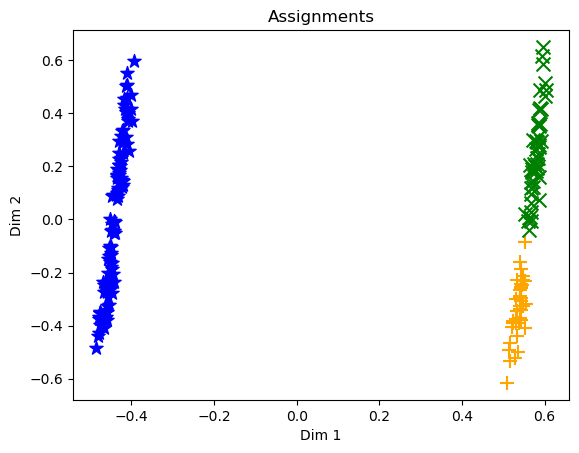

In [64]:
### let's try to visualize the clusters using pca

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca = PCA(n_components=2).fit(features)
features_2d = pca.transform(features)

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.title('Assignments')
    plt.show()
    

plot_clusters(features_2d, labels)

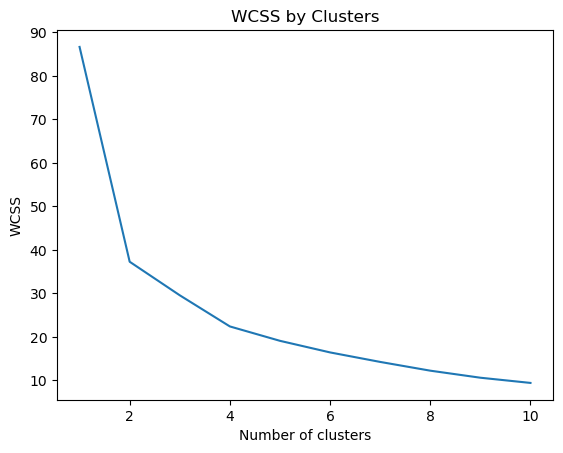

In [68]:
### Altering the number of clusters and checking the within cluster sum of squares
import os
import warnings

warnings.filterwarnings("ignore")
# os.environ["OMP_NUM_THREADS"] = "1"

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method, it is noticable that when the number of clusters is 4, there is no more a noticable change in wcss